In [1]:
# mesh = UnitSquare(32,32)
# V = FunctionSpace(mesh, "CG", 1)

In [2]:
import dolfin as dlf

In [3]:
mesh = dlf.UnitSquareMesh(32,32)
mesh

In [4]:
#dir(dlf)

In [5]:
dlf.FunctionSpace(mesh,'CG',1)

FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), FiniteElement('Lagrange', triangle, 1))

In [6]:
FS = dlf.FunctionSpace(mesh,'CG',1)

In [7]:
dir(FS)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cpp_object',
 '_init_convenience',
 '_init_from_cpp',
 '_init_from_ufl',
 '_ufl_domain',
 '_ufl_element',
 '_ufl_hash_data_',
 '_ufl_signature_data_',
 'collapse',
 'component',
 'contains',
 'dim',
 'dofmap',
 'dolfin_element',
 'element',
 'extract_sub_space',
 'id',
 'mesh',
 'num_sub_spaces',
 'set_x',
 'split',
 'sub',
 'tabulate_dof_coordinates',
 'ufl_cell',
 'ufl_domain',
 'ufl_domains',
 'ufl_element',
 'ufl_function_space',
 'ufl_sub_spaces']

In [8]:
FS.element()

https://fenicsproject.org/pub/documents/ufc/ufc-user-manual/ufc-user-manual.pdf page 68 gives tables for number of cells 

http://victorsndvg.github.io/FEconv/formats/vtk.xhtml





## 27 element (quadratic) hexahedron with VTK node numbering convention 



```
Hexahedron
linear : 8 corners 
quadratic : 8 corners + 12 edge-center points 
cubic: 8 corners + 12 edge-center points + 6 face-center points + 1 volume-center point 

VTK Node number ordering for corners and edges: 

corners:                   edges:               

       z
7----------6            .----14----.      
|\     ^   |\           |\         |\     
| \    |   | \          | 15       | 13   
|  \   |   |  \         19 \       18 \   
|   4------+---5        |   .----12+---.  
|   |  +-- |-- | -> x   |   |      |   |  
3---+---\--2   |        .---+-10---.   |   
 \  |    \  \  |         \  16      \  17  
  \ |     \  \ |         11 |        9 |   
   \|      y  \|           \|         \|   
    0----------1            .----8-----.   
    
   
center-face node numbers 

y-z plane at x = -1 :   20 
y-z plane at x = +1 :   21
x-z plane at y = -1 :   22
x-z plane at y = +1 :   24
x-y plane at z = -1 :   23
x-y plane at z = +1 :   25

volume-center point node number: 26 
```

In [9]:
corner_coords = [
    [-1,-1,-1],
    [ 1,-1,-1],    
    [ 1, 1,-1],
    [-1, 1,-1],
    [-1,-1, 1],
    [ 1,-1, 1],
    [ 1, 1, 1],
    [-1, 1, 1],
]

# the corner nodes defining the edges
edge_nodes = [
    [0, 1], 
    [1, 2],
    [2, 3],
    [0, 3],
    [4, 5],
    [5, 6],
    [6, 7],
    [4, 7], 
    [0, 4],
    [1, 5],
    [2, 6],
    [3, 7],
]

# the corner nodes defning the faces
face_nodes = [ 
    [0,3,4,7],
    [1,2,5,6],
    [2,3,6,7],
    [0,1,2,3],
    [0,1,4,5],
    [4,5,6,7],
]

In [10]:
import numpy as np
edge_coords = []
for edge in edge_nodes:
    edge_center = (np.array(corner_coords[edge[0]]) + np.array(corner_coords[edge[1]]))/2
    edge_coords.append(edge_center.tolist())
    
face_coords = []    
for face in face_nodes:
    coord = np.array([0,0,0])    
    for i in range(0,4):
        coord += np.array(corner_coords[face[i]]) 
    face_coords.append(coord/4)    
    

In [11]:
vol_center_coords=[np.array(corner_coords).sum(axis=0)/8]

In [12]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

In [13]:
corner_coords=np.array(corner_coords)
edge_coords=np.array(edge_coords)
face_coords=np.array(face_coords)
vol_center_coords=np.array(vol_center_coords)

<IPython.core.display.Javascript object>


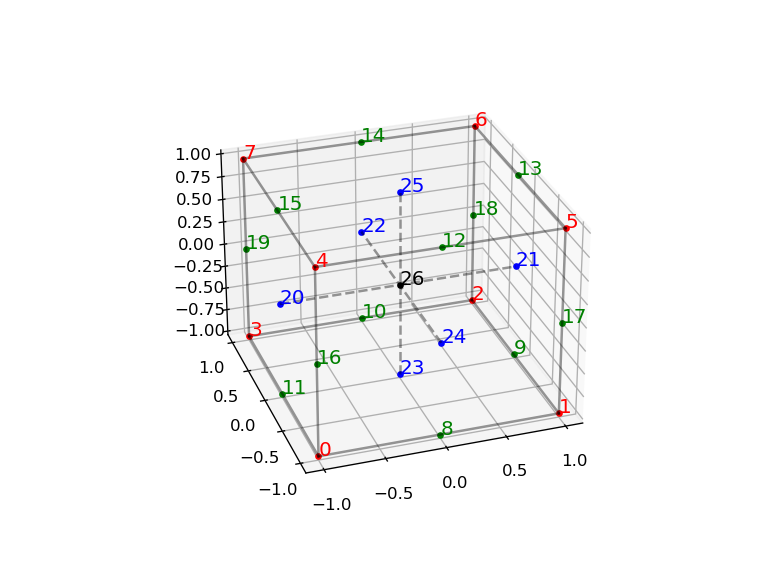

In [14]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

node_num=0
clrs=['r','g','b','k']
type_num=0
all_coords = []
for coords in [corner_coords, edge_coords, face_coords, vol_center_coords]:   
    
    for node in coords:
        ax.plot(node[0],node[1],node[2],marker='.',color=clrs[type_num])
        ax.text(node[0],node[1],node[2], str(node_num),fontsize=12,color=clrs[type_num])
        all_coords.append(node)
        node_num+=1 
    type_num+=1

all_coords = np.array(all_coords)
lncol=[0,0,0,.4]
for xyz in [1,-1]:
    ax.plot([-1,1],[xyz,xyz],[xyz,xyz],color=lncol)
    ax.plot([xyz,xyz],[-1,1],[xyz,xyz],color=lncol)
    ax.plot([xyz,xyz],[xyz,xyz],[-1,1],color=lncol)    
    ax.plot([-1,1],[-xyz,-xyz],[xyz,xyz],color=lncol)
    ax.plot([-xyz,-xyz],[-1,1],[xyz,xyz],color=lncol)
    ax.plot([-xyz,-xyz],[xyz,xyz],[-1,1],color=lncol)    

ax.plot([-1,1],[0.,0.],[0.,0.],'--',color=lncol)    
ax.plot([0.,0.],[-1,1],[0.,0.],'--',color=lncol)    
ax.plot([0.,0.],[0.,0.],[-1,1],'--',color=lncol)

In [15]:
# 1D lagrange polynomial 
import sympy as sy
def LagrangPoly(x,order,i,xi=None):
    if xi==None:
        xi=sy.symbols('x:%d'%(order+1))
    index = range(order+1)    
    return sy.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index if j != i])

In [16]:
all_coords.shape

(27, 3)

In [17]:
x_i = 1 
y_i = -1 
z_i = 1 



In [18]:
# corresponding quadratic lagrange poly 
x=sy.symbols('x')
y=sy.symbols('y')
z=sy.symbols('z')
shape_funcs = []

vtk_node_num = []
crd=[-1,0,1]
for z_i in range(3):
    for y_i in range(3):
        for x_i in range(3):        
            LP1 = LagrangPoly(x,2,x_i,crd)
            LP2 = LagrangPoly(y,2,y_i,crd)
            LP3 = LagrangPoly(z,2,z_i,crd)
            
            # find the VTK node number             
            indx = np.where((all_coords[:,0]==crd[x_i]) & (all_coords[:,1]==crd[y_i]) & (all_coords[:,2]==crd[z_i]))[0][0]                                   
            vtk_node_num.append(indx)
            shape_funcs.append(sy.simplify(LP1 * LP2 * LP3))        

In [19]:
Nnodes= 3 ** 3         
vals = [sy.symbols('f'+str(i)) for i in vtk_node_num]

sample_expression = sum([vals[i]*shape_funcs[i] for i in range(Nnodes)])
sample_expression

f0*x*y*z*(x - 1)*(y - 1)*(z - 1)/8 + f1*x*y*z*(x + 1)*(y - 1)*(z - 1)/8 - f10*y*z*(x - 1)*(x + 1)*(y + 1)*(z - 1)/4 - f11*x*z*(x - 1)*(y - 1)*(y + 1)*(z - 1)/4 - f12*y*z*(x - 1)*(x + 1)*(y - 1)*(z + 1)/4 - f13*x*z*(x + 1)*(y - 1)*(y + 1)*(z + 1)/4 - f14*y*z*(x - 1)*(x + 1)*(y + 1)*(z + 1)/4 - f15*x*z*(x - 1)*(y - 1)*(y + 1)*(z + 1)/4 - f16*x*y*(x - 1)*(y - 1)*(z - 1)*(z + 1)/4 - f17*x*y*(x + 1)*(y - 1)*(z - 1)*(z + 1)/4 - f18*x*y*(x + 1)*(y + 1)*(z - 1)*(z + 1)/4 - f19*x*y*(x - 1)*(y + 1)*(z - 1)*(z + 1)/4 + f2*x*y*z*(x + 1)*(y + 1)*(z - 1)/8 + f20*x*(x - 1)*(y - 1)*(y + 1)*(z - 1)*(z + 1)/2 + f21*x*(x + 1)*(y - 1)*(y + 1)*(z - 1)*(z + 1)/2 + f22*y*(x - 1)*(x + 1)*(y + 1)*(z - 1)*(z + 1)/2 + f23*z*(x - 1)*(x + 1)*(y - 1)*(y + 1)*(z - 1)/2 + f24*y*(x - 1)*(x + 1)*(y - 1)*(z - 1)*(z + 1)/2 + f25*z*(x - 1)*(x + 1)*(y - 1)*(y + 1)*(z + 1)/2 - f26*(x - 1)*(x + 1)*(y - 1)*(y + 1)*(z - 1)*(z + 1) + f3*x*y*z*(x - 1)*(y + 1)*(z - 1)/8 + f4*x*y*z*(x - 1)*(y - 1)*(z + 1)/8 + f5*x*y*z*(x + 1)*(y -

### element mapping with vtk api 


In [20]:
import vtk 

In [21]:
import vtk 
vH = vtk.vtkLagrangeHexahedron()

In [22]:
dir(vH)

['AddObserver',
 'BreakOnError',
 'CellBoundary',
 'Clip',
 'Contour',
 'DebugOff',
 'DebugOn',
 'DeepCopy',
 'Derivatives',
 'EvaluateLocation',
 'EvaluatePosition',
 'FastDelete',
 'GetAddressAsString',
 'GetBounds',
 'GetCellDimension',
 'GetCellType',
 'GetClassName',
 'GetCommand',
 'GetDebug',
 'GetEdge',
 'GetFace',
 'GetFaces',
 'GetGlobalWarningDisplay',
 'GetLength2',
 'GetMTime',
 'GetNumberOfEdges',
 'GetNumberOfFaces',
 'GetNumberOfGenerationsFromBase',
 'GetNumberOfGenerationsFromBaseType',
 'GetNumberOfPoints',
 'GetOrder',
 'GetParametricCenter',
 'GetParametricCoords',
 'GetParametricDistance',
 'GetPointId',
 'GetPointIds',
 'GetPoints',
 'GetReferenceCount',
 'GlobalWarningDisplayOff',
 'GlobalWarningDisplayOn',
 'HasObserver',
 'Initialize',
 'InitializeObjectBase',
 'InterpolateDerivs',
 'InterpolateFunctions',
 'IntersectWithLine',
 'InvokeEvent',
 'IsA',
 'IsExplicitCell',
 'IsLinear',
 'IsPrimaryCell',
 'IsTypeOf',
 'Modified',
 'NewInstance',
 'NodeNumberingMap

In [23]:
print([
    vH.GetNumberOfPoints(),
    vH.GetNumberOfEdges(),
    vH.GetNumberOfFaces(),
])

[8, 12, 6]


In [24]:
vH.GetCellDimension()

3

In [45]:
cellOrder = 1
vH.SetOrder(cellOrder,cellOrder,cellOrder)

vtk_to_el_ijk = { }
el_i = 0 
for k in range(cellOrder+1):
    for j in range(cellOrder+1):        
        for i in range(cellOrder+1):
            pts = vH.PointIndexFromIJK(i,j,k)
            ijk.append([i,j,k])
            vtk_to_el_ijk[pts] = {'ijk':[i,j,k],'el_i':el_i}
            el_i += 1
              
vtk_to_el_ijk

{0: {'ijk': [0, 0, 0], 'el_i': 0},
 1: {'ijk': [1, 0, 0], 'el_i': 1},
 3: {'ijk': [0, 1, 0], 'el_i': 2},
 2: {'ijk': [1, 1, 0], 'el_i': 3},
 4: {'ijk': [0, 0, 1], 'el_i': 4},
 5: {'ijk': [1, 0, 1], 'el_i': 5},
 7: {'ijk': [0, 1, 1], 'el_i': 6},
 6: {'ijk': [1, 1, 1], 'el_i': 7}}

![](resources/vtkCellOrdering.png?raw=true)

In [46]:
import vtk 
vH = vtk.vtkLagrangeHexahedron()

cellOrder = 2
vH.SetOrder(cellOrder,cellOrder,cellOrder)

vtk_to_el_ijk = { }
el_i = 0 
for k in range(cellOrder+1):
    for j in range(cellOrder+1):
        for i in range(cellOrder+1):
            pts = vH.PointIndexFromIJK(i,j,k)
            ijk.append([i,j,k])
            vtk_to_el_ijk[pts] = {'ijk':[i,j,k],'el_i':el_i}
            el_i += 1
              
vtk_to_el_ijk

{0: {'ijk': [0, 0, 0], 'el_i': 0},
 8: {'ijk': [1, 0, 0], 'el_i': 1},
 1: {'ijk': [2, 0, 0], 'el_i': 2},
 11: {'ijk': [0, 1, 0], 'el_i': 3},
 24: {'ijk': [1, 1, 0], 'el_i': 4},
 9: {'ijk': [2, 1, 0], 'el_i': 5},
 3: {'ijk': [0, 2, 0], 'el_i': 6},
 10: {'ijk': [1, 2, 0], 'el_i': 7},
 2: {'ijk': [2, 2, 0], 'el_i': 8},
 16: {'ijk': [0, 0, 1], 'el_i': 9},
 22: {'ijk': [1, 0, 1], 'el_i': 10},
 17: {'ijk': [2, 0, 1], 'el_i': 11},
 20: {'ijk': [0, 1, 1], 'el_i': 12},
 26: {'ijk': [1, 1, 1], 'el_i': 13},
 21: {'ijk': [2, 1, 1], 'el_i': 14},
 19: {'ijk': [0, 2, 1], 'el_i': 15},
 23: {'ijk': [1, 2, 1], 'el_i': 16},
 18: {'ijk': [2, 2, 1], 'el_i': 17},
 4: {'ijk': [0, 0, 2], 'el_i': 18},
 12: {'ijk': [1, 0, 2], 'el_i': 19},
 5: {'ijk': [2, 0, 2], 'el_i': 20},
 15: {'ijk': [0, 1, 2], 'el_i': 21},
 25: {'ijk': [1, 1, 2], 'el_i': 22},
 13: {'ijk': [2, 1, 2], 'el_i': 23},
 7: {'ijk': [0, 2, 2], 'el_i': 24},
 14: {'ijk': [1, 2, 2], 'el_i': 25},
 6: {'ijk': [2, 2, 2], 'el_i': 26}}

<IPython.core.display.Javascript object>


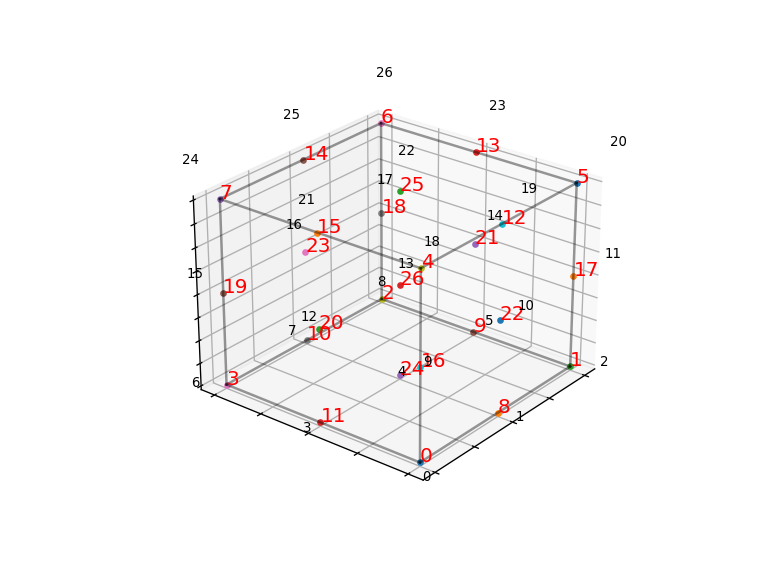

[Text(-1.0, 0, ''),
 Text(-0.75, 0, ''),
 Text(-0.5, 0, ''),
 Text(-0.25, 0, ''),
 Text(0.0, 0, ''),
 Text(0.25, 0, ''),
 Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, '')]

In [49]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

ofc=1.2
for vtk_node,node_info in vtk_to_el_ijk.items():
    node=np.array(node_info['ijk']) -1 
    
    ax.plot(node[0],node[1],node[2],marker='.')
    ax.text(node[0],node[1],node[2], str(vtk_node),fontsize=12,color='r')
        
    ijk_lab = str(node_info['el_i'])#+', ',str(node_info['ijk'])
    ax.text(node[0]*ofc+.1,node[1]*ofc+.1,node[2]*ofc+.1, ijk_lab,fontsize=8,color='k')
    
# all_coords = np.array(all_coords)
lncol=[0,0,0,.4]
for xyz in [1,-1]:
    ax.plot([-1,1],[xyz,xyz],[xyz,xyz],color=lncol)
    ax.plot([xyz,xyz],[-1,1],[xyz,xyz],color=lncol)
    ax.plot([xyz,xyz],[xyz,xyz],[-1,1],color=lncol)    
    ax.plot([-1,1],[-xyz,-xyz],[xyz,xyz],color=lncol)
    ax.plot([-xyz,-xyz],[-1,1],[xyz,xyz],color=lncol)
    ax.plot([-xyz,-xyz],[xyz,xyz],[-1,1],color=lncol)    
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

In [50]:
import numpy as np 

So given an array of values from a VTU file, can use the above dict to re-arrange.

e.g., for 3 cells with 27 nodes (data are the VTK cell number for reference):  

In [74]:
VTU_cell_values = np.array([
    np.arange(0,27,1),
    np.arange(0,27,1),
    np.arange(0,27,1),
])
VTU_cell_values

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]])

In [75]:
VTU_cell_values.shape

(3, 27)

In [70]:
new_ordering=list(vtk_to_el_ijk.keys())

In [71]:
new_ordering=list(vtk_to_el_ijk.keys())
VTU_cell_values.take(new_ordering,axis=1)

array([[ 0,  8,  1, 11, 24,  9,  3, 10,  2, 16, 22, 17, 20, 26, 21, 19,
        23, 18,  4, 12,  5, 15, 25, 13,  7, 14,  6],
       [ 0,  8,  1, 11, 24,  9,  3, 10,  2, 16, 22, 17, 20, 26, 21, 19,
        23, 18,  4, 12,  5, 15, 25, 13,  7, 14,  6],
       [ 0,  8,  1, 11, 24,  9,  3, 10,  2, 16, 22, 17, 20, 26, 21, 19,
        23, 18,  4, 12,  5, 15, 25, 13,  7, 14,  6]])

In [82]:
vQH = vtk.vtkQuadraticHexahedron()
vQH.GetNumberOfPoints()
vQH.GetNumberOfFaces()


TypeError: GetParametricCenter() takes exactly 1 argument (0 given)

In [88]:
dir(vQH)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

In [89]:
vQH.GetCellType()

25